## Problem statement
Understanding the relation between the various factor like bmi, number of children or smoker affecting the Hosiptalization charges.
Predicting the hospitalization by understanding patterns from other parameters

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [43]:
data = pd.read_csv("insurance.csv")

In [44]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [45]:
data.shape

(1338, 7)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [49]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.665471,6.098382,16.0,26.3,30.4,34.7,53.1
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422414,12110.01124,1121.87,4740.2875,9382.03,16639.915,63770.43


## From the above table, we can say -
- Mean age is around 39
- Mean BMI is 30.66
- Max number of childerns is 5
- Mean charges is 12k but the 50% is 9K so there is a hint of outlier

## Non Graphical Analysis

In [50]:
data["age"].value_counts().sort_values(ascending=False)[:10]

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
Name: count, dtype: int64

Most common ages that we can see is 18-20 and 45-52.

In [51]:
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [52]:
data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [53]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [54]:
sex = data.groupby(["sex"]).agg({"age": ["mean"]})
sex.reset_index()


,sex,age
,,mean
0,female,39.503021
1,male,38.917160


In [55]:
# Mean age of both sexes are almost same.
smoker = data.groupby(["smoker"]).agg({"age": ["mean"]})
smoker.reset_index()

,smoker,age
,,mean
0,no,39.385338
1,yes,38.514599


In [56]:
# Mean age across regions is almsot same
smoker = data.groupby(["region"]).agg({"age": ["mean"]})
smoker.reset_index()


,region,age
,,mean
0,northeast,39.268519
1,northwest,39.196923
2,southeast,38.939560
3,southwest,39.455385


## Univariate Analysis

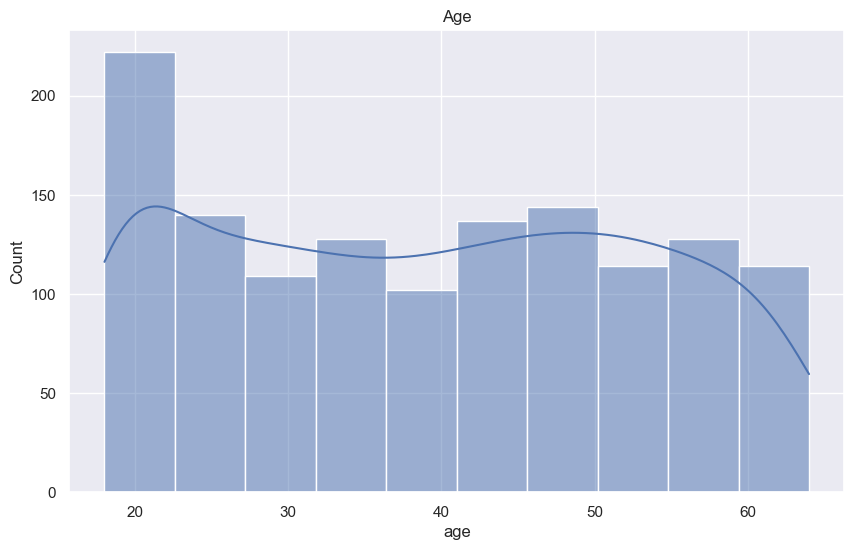

In [57]:
# Age distribution is almost normal. People with age
# under 23 is more than rest ages.
plt.figure(figsize=(10, 6))
sns.histplot(data["age"], kde=True, bins=10)
plt.title("Age")
plt.show()


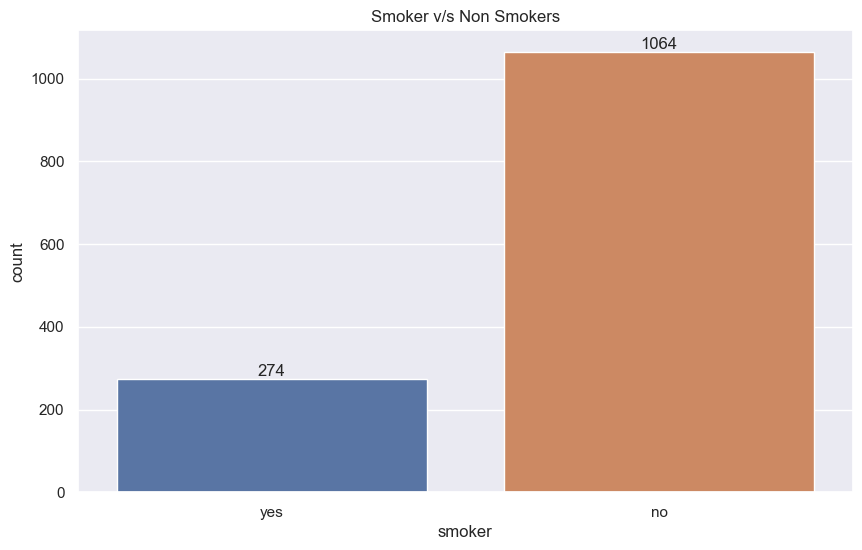

In [58]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x="smoker")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Smoker v/s Non Smokers")
plt.show()

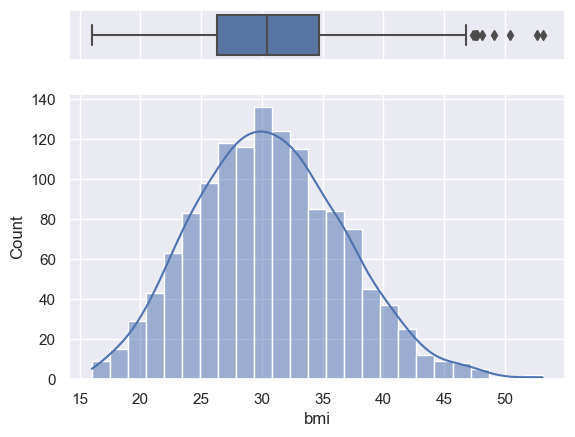

In [59]:
# Both sex have almost equal number of data
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)
sns.boxplot(data=data, x="bmi", ax=ax_box)
sns.histplot(data=data, x="bmi", ax=ax_hist, kde=True)
ax_box.set(xlabel="")
plt.show()


## Treating Outliers

In [60]:
Q3 = data["bmi"].quantile(0.75)
Q1 = data["bmi"].quantile(0.25)
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

In [61]:
data = data[(data["bmi"] > lower) & (data["bmi"] < upper)]

In [62]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


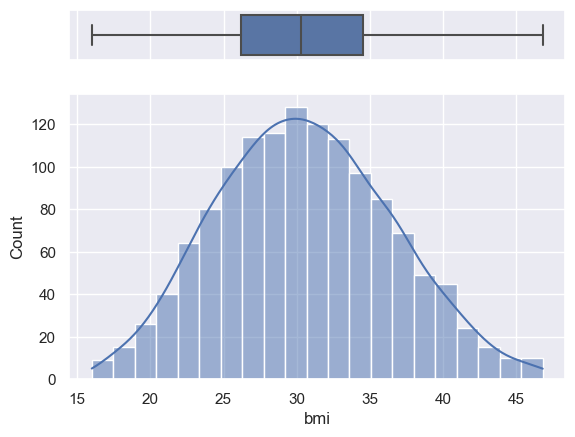

In [63]:
sns.set_style("darkgrid")
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)
sns.boxplot(data=data, x="bmi", ax=ax_box)
sns.histplot(data=data, x="bmi", ax=ax_hist, kde=True)
ax_box.set(xlabel="")
plt.show()

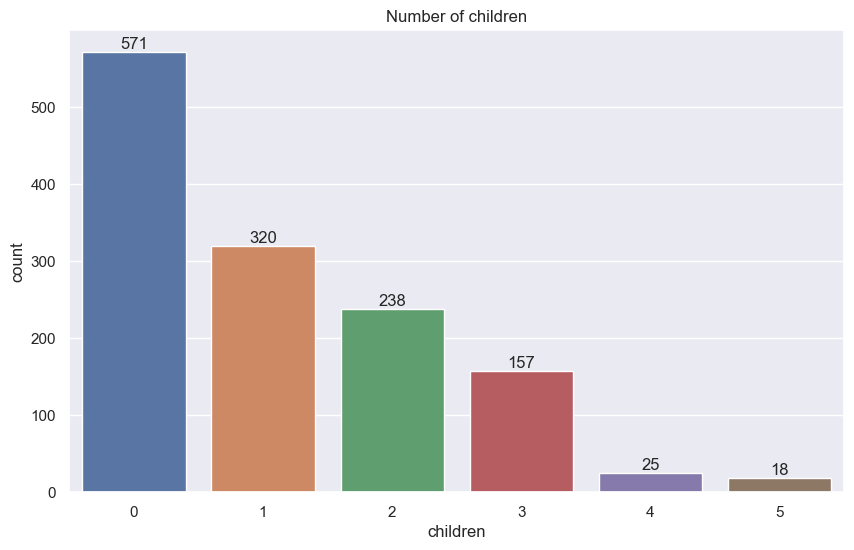

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x="children")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Number of children")
plt.show()

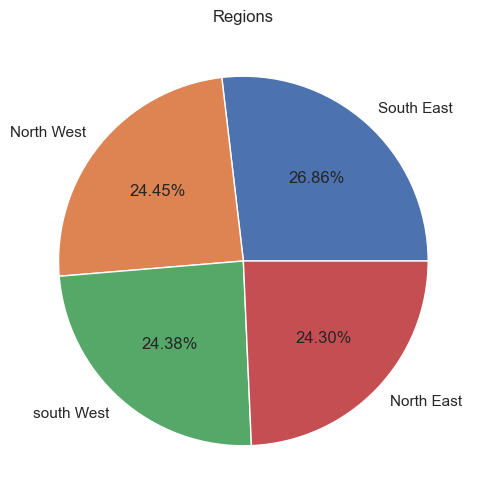

In [65]:
type_value_count = data["region"].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
plt.pie(
    type_value_count,
    labels=["South East", "North West", "south West", "North East"],
    autopct="%1.2f%%",
)
plt.title("Regions")
plt.show()

In [66]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

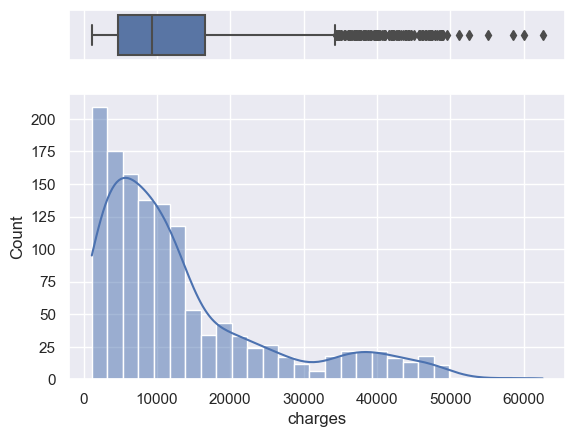

In [67]:
# Data is higly right skewed. we transform data to make it normal.
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)
sns.boxplot(data=data, x="charges", ax=ax_box)
sns.histplot(data=data, x="charges", ax=ax_hist, kde=True)
ax_box.set(xlabel="")
plt.show()


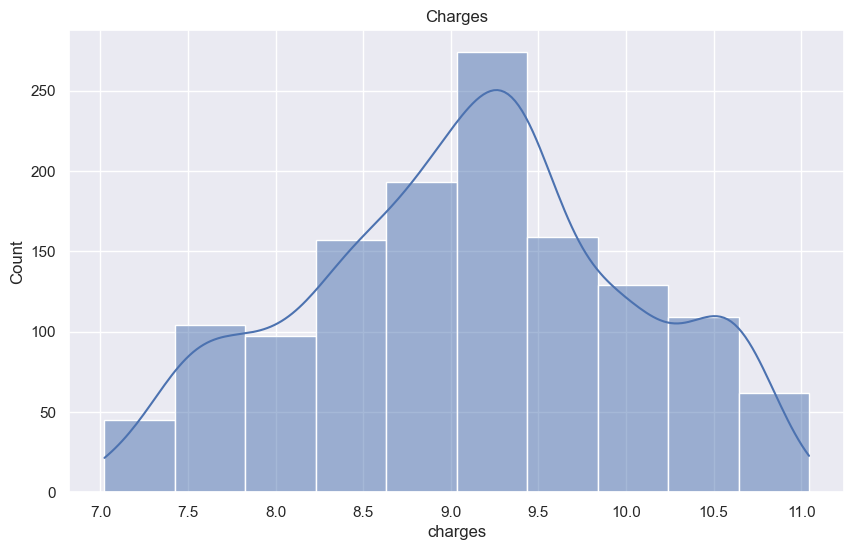

In [68]:
# Performing log transformation we get almost normal
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data["charges"]), kde=True, bins=10)
plt.title("Charges")
plt.show()


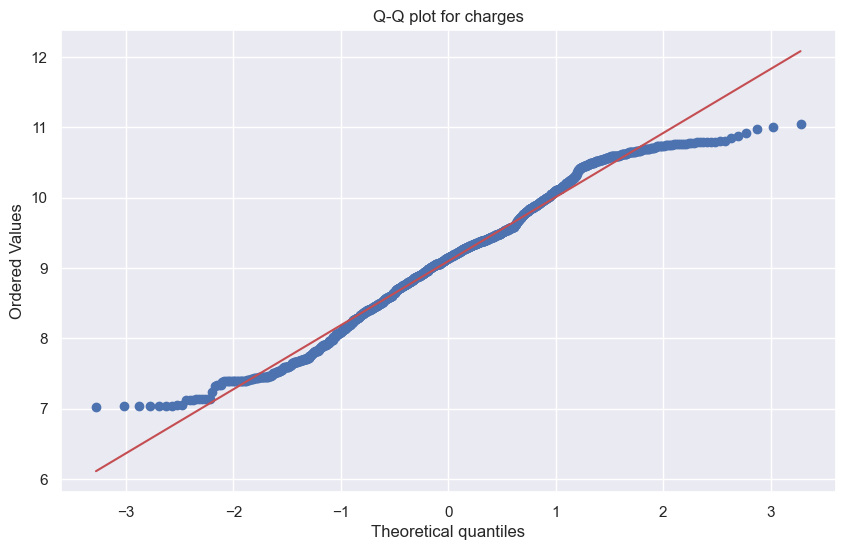

In [69]:
# Checking Normality using Q-Q Plot.
plt.figure(figsize=(10, 6))
stats.probplot(data["charges"].apply(np.log), plot=plt, dist="norm")
plt.title("Q-Q plot for charges")
plt.show()
# As seen from the Q-Q plot the data is almost normal. Will perform Shapiro Wilk test once to confirm hypothesis

## Performing lot transformation

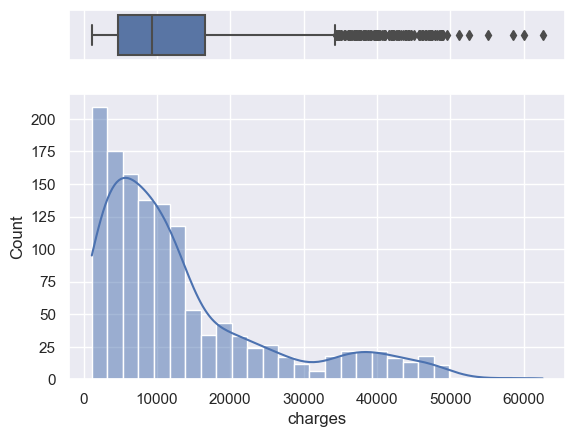

In [70]:
sns.set_style("darkgrid")
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)
sns.boxplot(data=data, x="charges", ax=ax_box)
sns.histplot(data=data, x="charges", ax=ax_hist, kde=True)
ax_box.set(xlabel="")
plt.show()


From the above graph, we can say-
- Avg charges is around 18k
- 75% of charges are less than 35k
- 25% of cahrges are less than 15k

## Bivariate Analysis

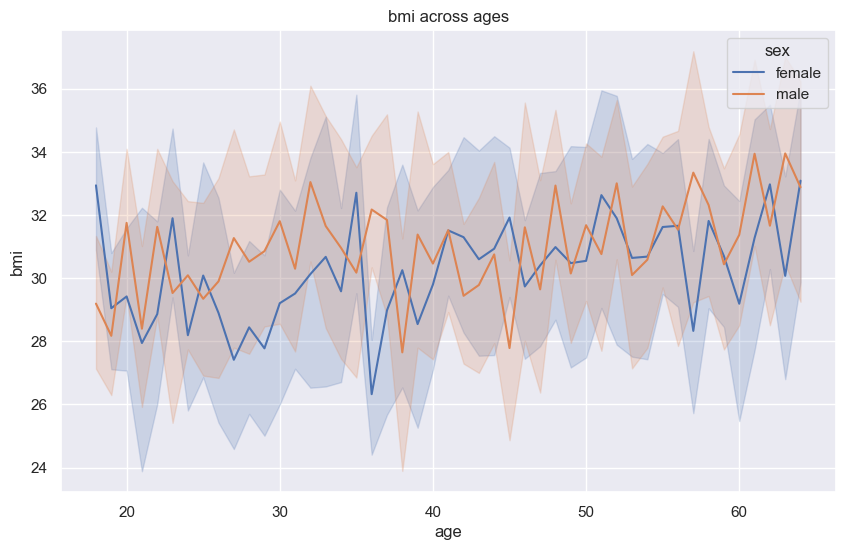

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="age", y="bmi", data=data, hue="sex")
plt.title("bmi across ages")
plt.show()

**From the above graph, we can say-**
- Male with age between 26 and 32 have significantly more BMI than Females in same age range
- More or less both the age group shares same trend in BMI throughtout various agres.

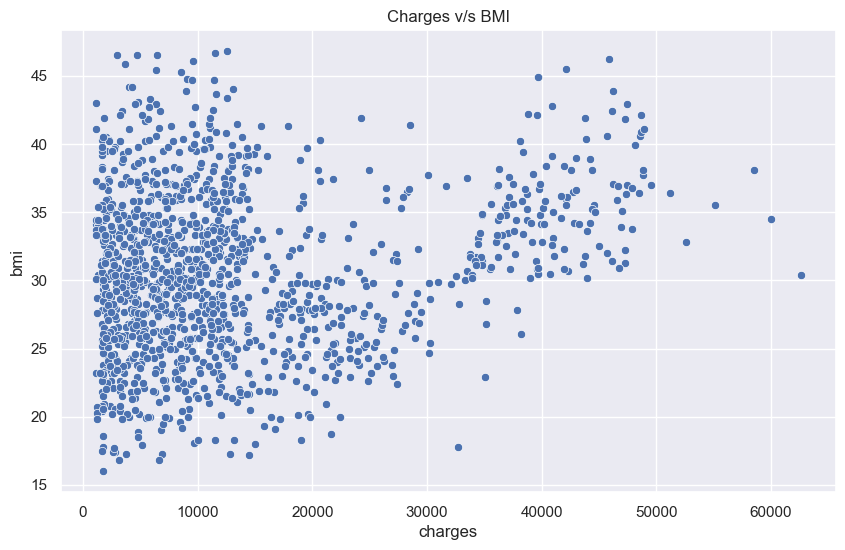

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y="bmi", x="charges", data=data)
plt.title("Charges v/s BMI")
plt.show()

**From the above graph we can say-**
- Charges is almost uniformly distributed
- Higher BMI have only high charge

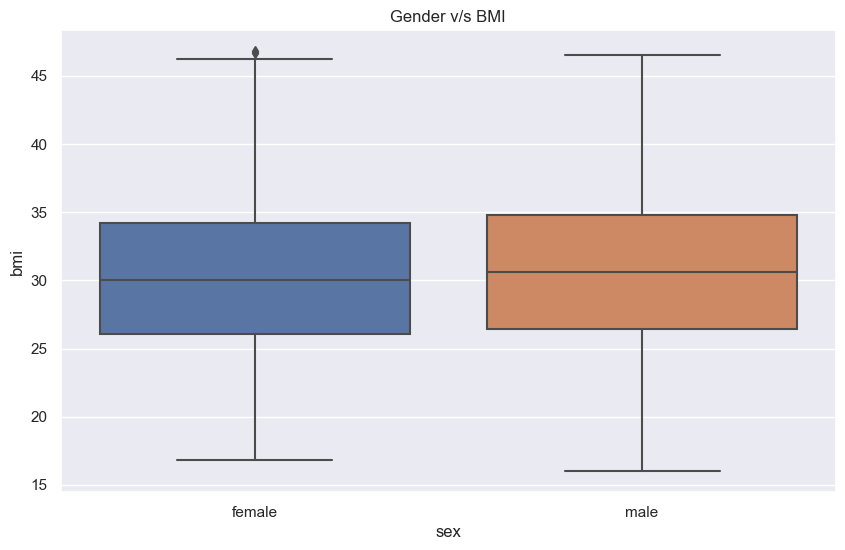

In [73]:
# Almost both the sexes have sme BMI with males having a slightly higher average BMI.
plt.figure(figsize=(10, 6))
sns.boxplot(x="sex", y="bmi", data=data)
plt.title("Gender v/s BMI")
plt.show()


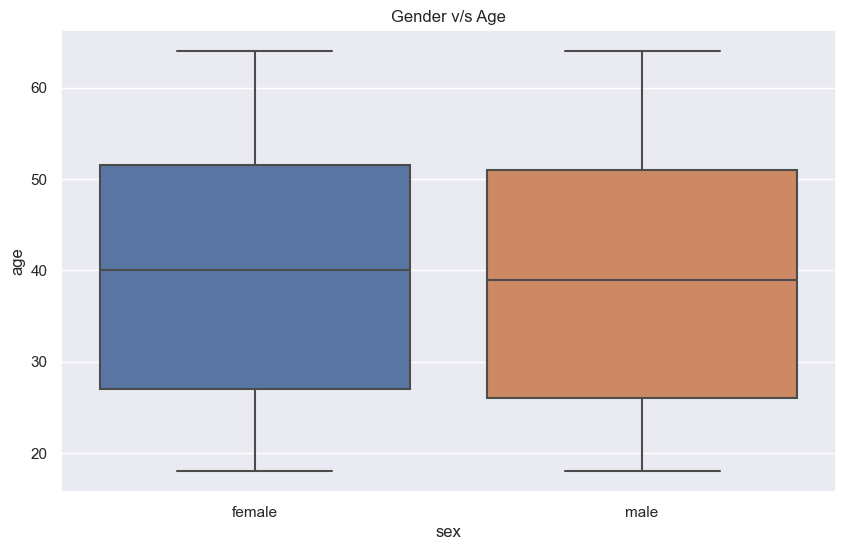

In [32]:
# Females mean age is more than male, but the age group spread is more on males.
plt.figure(figsize=(10, 6))
sns.boxplot(x="sex", y="age", data=data)
plt.title("Gender v/s Age")
plt.show()


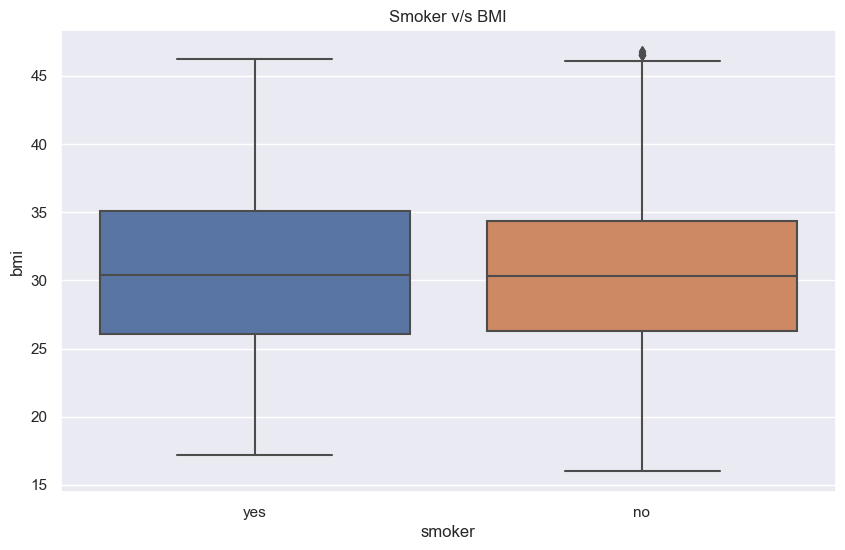

In [33]:
# Avereage BMI is slightly more for smokers than non-smokers
plt.figure(figsize=(10, 6))
sns.boxplot(x="smoker", y="bmi", data=data)
plt.title("Smoker v/s BMI")
plt.show()


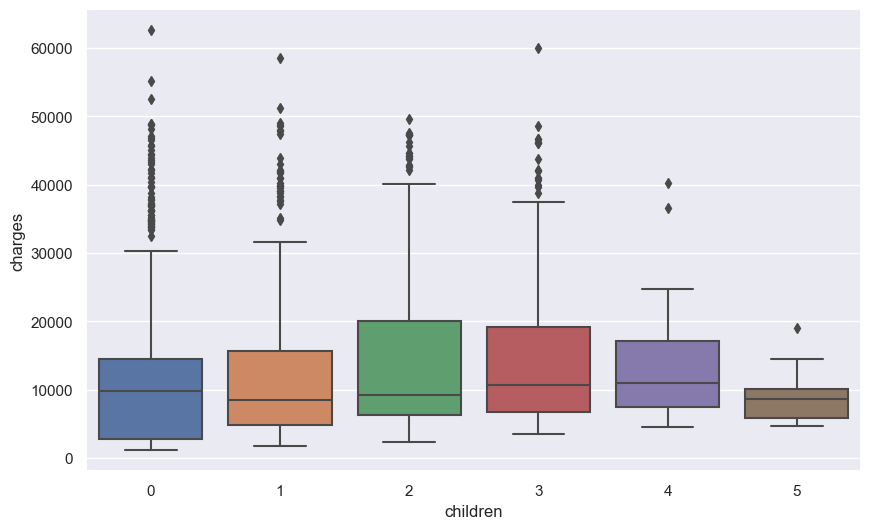

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="children", y="charges", data=data)
plt.show()

## From the above graph, we can say
- Almost all the number of childeren have same average of charge.
- Number of children 0,1,2 may be low but the charges are still high

In [89]:
Number_of_children_for_smoke

,smoker,children,Percent
0,no,0,43.194707
1,no,1,24.574669
2,no,2,17.391304
3,no,3,11.153119
4,no,4,2.079395
5,no,5,1.606805
6,yes,0,42.066421
7,yes,1,22.140221
8,yes,2,19.926199
9,yes,3,14.391144


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

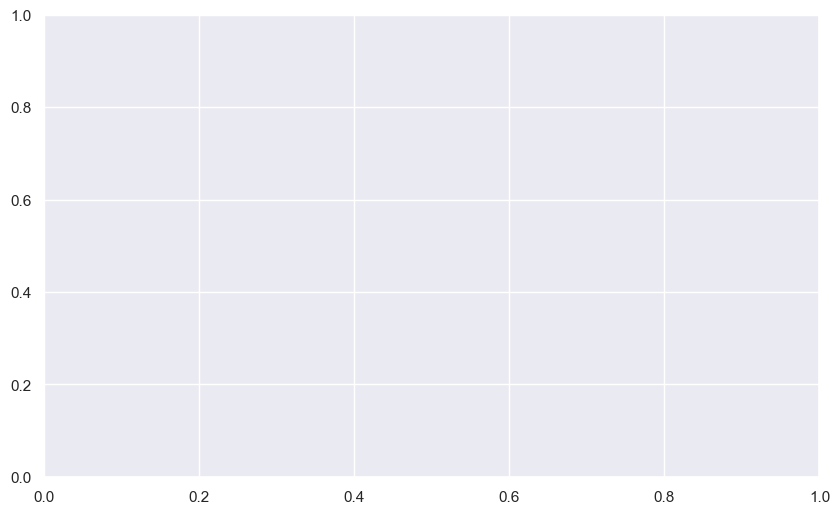

In [105]:
# The Number of children across smoker and non smoker are almost same.

plt.figure(figsize=(10,6))
(data
.groupby(['smoker'])['children']
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
).pipe((sns.barplot, 'data'), x='smoker', y='Percent', hue='children',)
plt.title('Number of children for Smokers')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

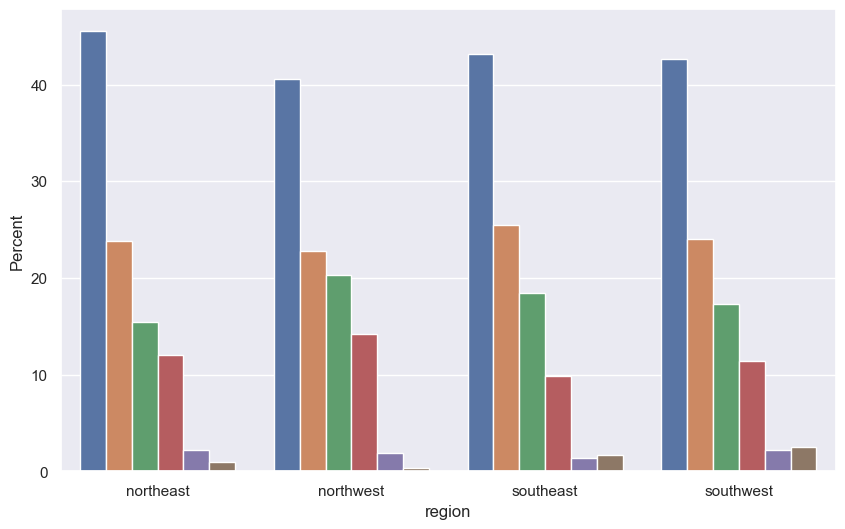

In [77]:
plt.figure(figsize=(10, 6))
(
    data.groupby(["region"])["children"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percent")
    .reset_index()
).pipe((sns.barplot, "data"), x="region", y="Percent", hue="children")
plt.title("Number of children per Region")
plt.show()
# All the regions seems to have same share of seveity levels.

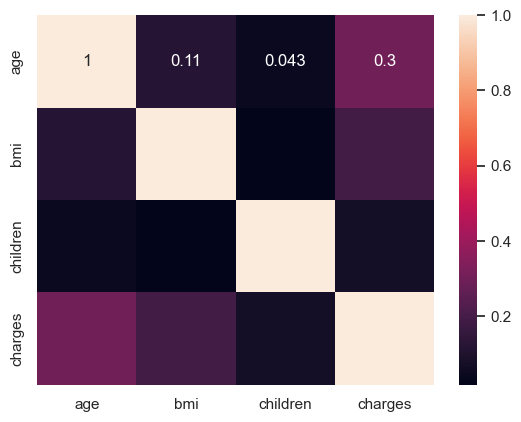

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()
# We can see good co-relation between the age and charges.

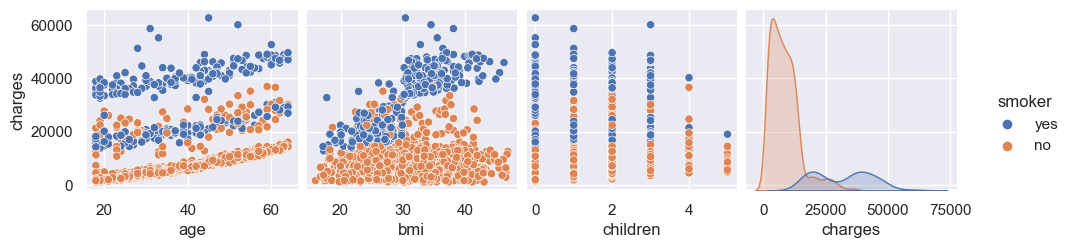

In [ ]:
sns.pairplot(data, hue="smoker", y_vars=["charges"])
plt.show()

## Hypothesis Testing

|Setting up a function to return result on the basis of the significant value(0.05)

In [ ]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level:
        print("Reject NULL HYPOTHESIS")
    else:
        print("Fail to Reject NULL HYPOTHESIS")

To prove charges of people who do smoking are greater than those who don't.
## Performing Right Tailed T-test
Null Hypothesis (H0) - Charges are same for Smokers and Non-Smokers
ALternater Hypothesis (HA) - Charges are greater for smokers.
## First Step-
Checking for basic assumpitions for the hypothesis
## Second step-
Performing Right tailed t-test
## Third step-
Checking for hypothesis result
## Checking for basic assumptions
- Normality check
- Homegeneity of Variances

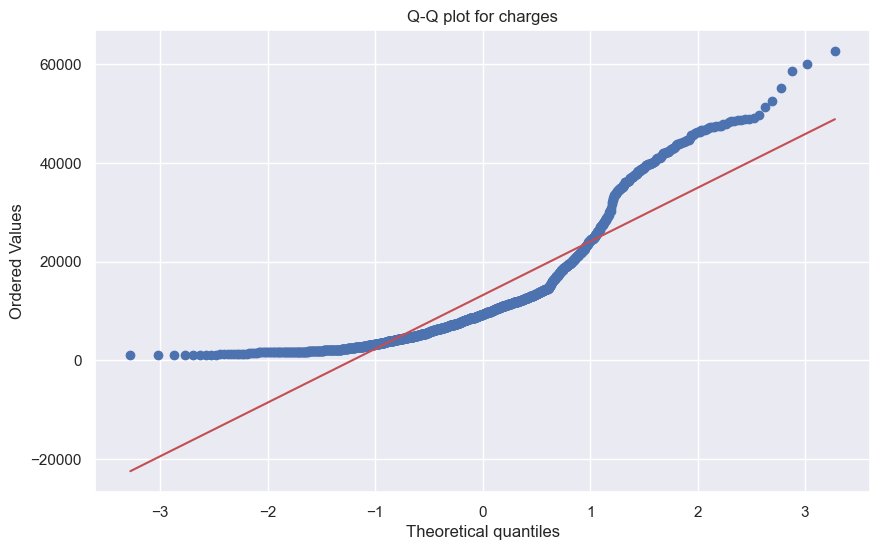

In [ ]:
# For normality check, using Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data["charges"], plot=plt, dist="norm")
plt.title("Q-Q plot for charges")
plt.show()


From the above graph we can say, the data points roughly fall along a straight diagonal line in a Q-Q plot, then the dataset likely follows a
normal distribution.

## Homogeneity of Variances using Lavene's test
- Null Hypothesis(H0) - Homogenous Variance
- Alternate Hypothesis(HA) - Non Homogenous variance

In [ ]:
smokers = data[data["smoker"] == "yes"]["charges"]
non_smokers = data[data["smoker"] == "no"]["charges"]
stat, p = levene(smokers, non_smokers)

In [ ]:
print("P-value :", p)

P-value : 4.523029227443654e-65


In [ ]:
htResult(p)

Reject NULL HYPOTHESIS


We reject null hypothesis, which means variance is not equal


## Performing Right tailed t-test

In [ ]:
st, p = stats.ttest_ind(smokers, non_smokers)
print("P-value :", (p / 2))

P-value : 1.2616538425018756e-279


In [ ]:
htResult(p / 2)

Reject NULL HYPOTHESIS


## Answer
We reject null hypothesis, which means the hospitalization chrage for smokers is more than non-smoker.

## Question 3 -
To check if the proportion of smoking significantly different across different regions.

## Performing Chi-Square test
Null Hypothesis ( H0 ) - Proportion of smoking is equal across different regions.

Alternate Hypothesis ( HA ) - Proportion of smoking is different across different regions.
## First step-
Performing chi-square test
## Second step -
Checking for hypothesis result

In [ ]:
cont = pd.crosstab(data["smoker"], data["region"])
value = np.array([cont.iloc[0][0:4].values, cont.iloc[1][0:4].values])

Performing chi-square test

In [ ]:
c, p, dof, expected = stats.chi2_contingency(value)
print("P-value :", p)

P-value : 0.05978076201764091


In [ ]:
htResult(p)

Fail to Reject NULL HYPOTHESIS


## Answer
We fail to reject null hypothesis, which means the proportion of smoking is same across different regions.

## Question 4 -
To check if the mean BMI of women with 0 child , 1 child, and 2 children the same.
### Performing One-way Anova
Null Hypothesis ( H0 ) - Mean BMI for females of children 0,1,2 is same.

Alternate Hypothesis ( HA ) - Mean BMI for females of children 0,1,2 is different.

First Step - Checking for basic assumpitons for the hypothesis
### Second step-
Performing One-way Anova
### Third step -
Checking for hypothesis result
### Checking for basic assumptions
- Normality check
- Homogeneity of Variances
Normality check for viral load is done and found out to be normal.
### Homogeneity of Variances with Levene's test
Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous variance

In [ ]:
female = data[data["sex"] == "female"]
fem_ch_0 = female[female["children"] == 0]["bmi"]
fem_ch_1 = female[female["children"] == 1]["bmi"]
fem_ch_2 = female[female["children"] == 2]["bmi"]
fem_ch_3 = female[female["children"] == 3]["bmi"]
fem_ch_4 = female[female["children"] == 4]["bmi"]
fem_ch_5 = female[female["children"] == 5]["bmi"]

In [ ]:
stat, p = levene(fem_ch_0, fem_ch_1, fem_ch_3, fem_ch_4, fem_ch_5)
print("P-value :", p)

P-value : 0.3766950483543421


In [ ]:
htResult(p)
# We fail to reject null hypothesis, which means the variance is same across the groups.

Fail to Reject NULL HYPOTHESIS



### Performing One-Way Anova


In [ ]:
stat, p = stats.f_oneway(fem_ch_0, fem_ch_1, fem_ch_2, fem_ch_3, fem_ch_4, fem_ch_5)
print("P-value :", p)

P-value : 0.9469667910796313


In [ ]:
htResult(p)

Fail to Reject NULL HYPOTHESIS


### Answer
We fail to reject null hypothesis, which means the mean viral load for females of severity levels 0,1,2 is same
## Recommendations -
- As we can observe the smokers in general have a higher charges so we can create awareness around to stop smoking as it is not at
all pocket friendly.
- Women with any number of children have almost same BMI as observed by hypothesis testing, basic awareness around family
planning can be provided to keep them from facing financial issues.
- With increasing age the charges too increase, so we can promote a healthy living in the middle ages to avoid these charges in the
later stage of life.